In [4]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

### I - Virat Kohli Dataset

In [7]:
df = pd.read_csv("https://github.com/yashj1301/Python3-UpGrad-UMich/raw/master/Python%203.x/Upgrad/Modules/Module%204%20-%20Data%20Visualization/Data/virat.csv")

In [8]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [35]:
df['Dismissal'].value_counts()

caught        84
not out       17
run out       10
bowled        10
lbw            9
stumped        1
hit wicket     1
Name: Dismissal, dtype: int64

In [36]:
df['Runs']=df['Runs'].str.strip('*').astype(int)
df['Runs']

0       12
1       37
2       25
3       54
4       31
      ... 
127     45
128     65
129    122
130      8
131     55
Name: Runs, Length: 132, dtype: int64

In [47]:
desc=df['Runs'].describe(percentiles=[0.25,0.5,1])
desc['50%']-desc['25%']

22.5

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


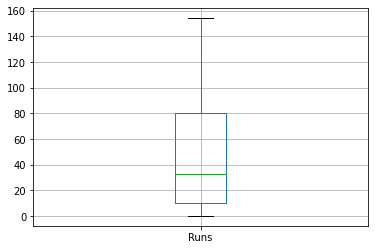

In [50]:
#Your code here
df[['Runs']].boxplot()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [111]:
# Year in which Virat played max matches

date=df['Start Date'].str.rsplit('-',n=2,expand=True)
date.rename(columns={0:'Date',1:'Month',2:'Year'},inplace=True)
date['Year']=date['Year'].apply(lambda x:int(x)+2000)
date['Year'].value_counts().idxmax()

2011

In [213]:
# Year having highest average and the corresponding year

virat=df.copy()
virat['Year']=virat['Start Date'].apply(lambda x:int(x.split('-')[-1])+2000)
virat.groupby('Year').mean()['Runs'].max(),virat.groupby('Year').mean()['Runs'].idxmax()

(73.9, 2016)

In [215]:
virat.pivot_table(values='Runs',aggfunc=[np.mean,np.max],index='Year').idxmax()

mean  Runs    2016
amax  Runs    2016
dtype: int64

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


(array([3., 1., 5., 0., 3., 6., 2., 1., 3., 1., 4., 1., 6., 6., 4.]),
 array([ 54.6 ,  59.96,  65.32,  70.68,  76.04,  81.4 ,  86.76,  92.12,
         97.48, 102.84, 108.2 , 113.56, 118.92, 124.28, 129.64, 135.  ]),
 <a list of 15 Patch objects>)

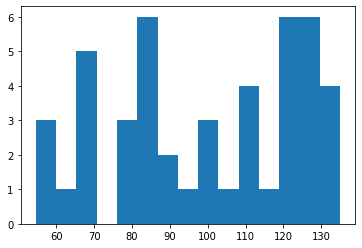

In [214]:
virat['Mins']=virat['Mins'].str.replace('-','0').astype(int)
plot.hist(virat['Mins'],bins=15,range=[54.6,135])